In [1]:
import numpy as np
import matplotlib.pyplot as plt
from skimage.io import imshow
from matplotlib.pyplot import *
from PIL import Image 
import warnings

(1800, 2880, 3)


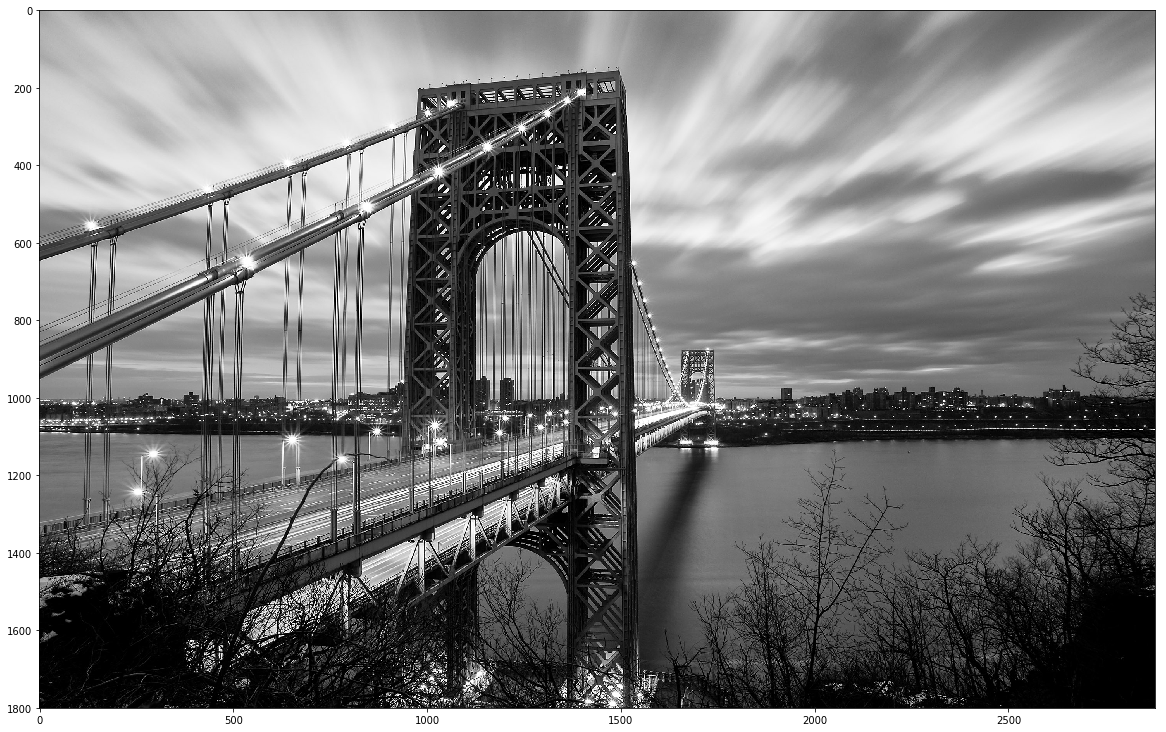

In [2]:
image_file = Image.open("image_for_compression.jpg") # open colour image
image = np.array(image_file)
print(image.shape)
figure(figsize = (20,30))
imshow(image)

# We can transform shape the matrix from (1800, 2880, 3) to (1800, 2880*3) and apply SVD in such matrix 

In [3]:
original_shape = image.shape
image_reshaped = image.reshape((original_shape[0],original_shape[1]*original_shape[2]))
original_size = image_reshaped.nbytes
image_reshaped.shape


(1800, 8640)

In [ ]:
u, s, vt = np.linalg.svd(image_reshaped, full_matrices=True)

In [ ]:
np.linalg.matrix_rank(image_reshaped)

After applying SVD, we are able to plot the energy of the matrix in order to find a good value for k

In [ ]:
k_energy = []
accum_energy = 0
k = s.size
for i in range(k):
    accum_energy += s[i]**2
    k_energy.append(accum_energy)

In [ ]:
font = {'family': 'serif',
        'color':  'darkred',
        'weight': 'normal',
        'size': 18,
        }
plt.figure(figsize = (9,7))
plt.ylabel('Energía acumulada', fontdict=font)
plt.xlabel('Cantidad de autovalores', fontdict=font)
plt.plot(k_energy/accum_energy)

We may notice that using k = 500 would be a good choice. Let's try it

In [ ]:
def reconstruct_image(k):    
    sigma = np.zeros((k,k))
    for i in range(k):
        sigma[i, i] = s[i]
    u_approximated = u[:, :k]
    vt_approximated = vt[0:k]
    reconstructed_image = np.dot(u_approximated, np.dot(sigma, vt_approximated))
    reconstructed_image = reconstructed_image.reshape(original_shape[0],original_shape[1],original_shape[2]).astype(int)
    figure(figsize = (20,30))
    imshow(reconstructed_image)

In [ ]:
warnings.filterwarnings('ignore')
k = 500
reconstruct_image(k)